In [25]:
!pip3 install -q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 16.6 s (started: 2024-10-28 12:31:26 +00:00)


In [26]:
#Import Block
import librosa
from matplotlib import pyplot as plt
import numpy as np
import os

time: 870 µs (started: 2024-10-28 12:31:43 +00:00)


In [27]:
DURATION = 8.18
SAMPLING_RATE = 16000
CHUNK_SAMPLES = int(DURATION * SAMPLING_RATE)

time: 7.11 ms (started: 2024-10-28 12:31:43 +00:00)


In [28]:
audio_clips = np.array([])
labels = np.array([], dtype='str')
for clip in os.listdir('/kaggle/input/indian-music-raga/'):
    y,_ = librosa.load(f'/kaggle/input/indian-music-raga/{clip}', mono=True, sr=SAMPLING_RATE)
    chunks = np.asarray([y[i:i + CHUNK_SAMPLES] for i in range(0, len(y), CHUNK_SAMPLES)], dtype='object')
    labels = np.append(labels, [clip.split('.')[0][:-2]] * len(chunks))
    audio_clips = np.append(audio_clips, chunks)

time: 22.2 s (started: 2024-10-28 12:31:43 +00:00)


In [29]:
from itertools import filterfalse
audio_clips = np.array(list(filterfalse(lambda x : x.shape != (130880,), audio_clips)))

time: 339 ms (started: 2024-10-28 12:32:05 +00:00)


In [30]:
# DURATION = 8.18
# # x, _ = librosa.load("../TestingMusic/Sine500.wav", mono=True, sr=44100)
# x, _ = librosa.load("/kaggle/input/indian-music-raga/Bhairavi01.wav", mono=True, sr=44100, duration=DURATION)
# x = librosa.resample(x, orig_sr=44100, target_sr=16000)

time: 565 µs (started: 2024-10-28 12:32:05 +00:00)


In [31]:
data = []
N_FFT = 1024
for clip in audio_clips:
    if (len(clip) < N_FFT): continue
    S = np.abs(librosa.stft(
        clip,
        n_fft=N_FFT,
    ))
    
    S = S[:512, :]
    data.append(S)
data = np.array(data)

time: 14.8 s (started: 2024-10-28 12:32:05 +00:00)


In [32]:
data.shape

(1487, 512, 512)

time: 5.18 ms (started: 2024-10-28 12:32:20 +00:00)


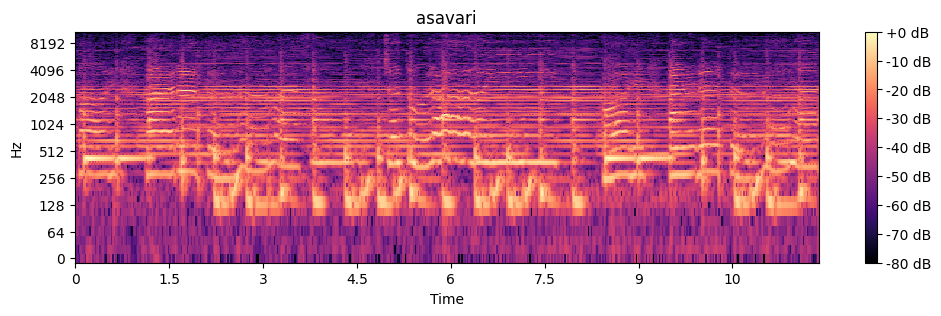

time: 954 ms (started: 2024-10-28 12:32:20 +00:00)


In [33]:
# S = np.abs(librosa.stft(
#     x,
#     n_fft=1024,
# ))
# S = S[:512, :]
sample_num = 1000
S = data[sample_num]

fig, ax = plt.subplots()
img = librosa.display.specshow(
    librosa.amplitude_to_db(S, ref=np.max),
    y_axis='log',
    x_axis='time',
    ax = ax
)

ax.set_title(labels[sample_num])
fig.colorbar(img, ax=ax, format="%+2.0f dB")
fig.set_size_inches(12, 3)

In [34]:
np.save('spectral_data.npy', data)
np.save('labels_data.npy', labels)

time: 2.09 s (started: 2024-10-28 12:32:21 +00:00)


In [35]:
!zip -r raga_spectrograms_data.zip /kaggle/working
from IPython.display import FileLink
FileLink(r'raga_spectrograms_data.zip')

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/spectral_data.npy (deflated 9%)
  adding: kaggle/working/labels_data.npy (deflated 99%)
  adding: kaggle/working/raga_spectrogram_data.zip (stored 0%)
  adding: kaggle/working/raga_spectrograms/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)


/kaggle/working/raga_spectrograms_data.zip

time: 1min 37s (started: 2024-10-28 12:32:23 +00:00)
